In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_charts as ds
import numpy as np
from globals import global_health_encoded_df as data



from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

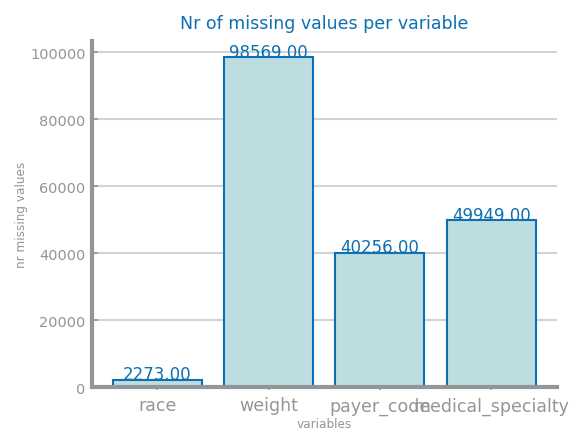

In [20]:
from matplotlib.pyplot import figure, savefig, show
from ds_charts import bar_chart
mv = {}
for var in data:
    nr = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr     
        
figure()
bar_chart(list(mv.keys()), list(mv.values()), title='Nr of missing values per variable',
            xlabel='variables', ylabel='nr missing values')
show()

In [21]:
# defines the number of records to discard entire columns
threshold = data.shape[0] * 0.37

missings = [c for c in mv.keys() if mv[c]>threshold]
data = data.drop(columns=missings, inplace=False)
print('Dropped variables', missings)

Dropped variables ['weight', 'payer_code', 'medical_specialty']


In [22]:
from pandas import DataFrame
def get_variable_types(df: DataFrame) -> dict:
    variable_types: dict = {
        'Numeric': [],
        'Binary': [],
        'Date': [],
        'Symbolic': []
    }
    for c in df.columns:
        uniques = df[c].dropna(inplace=False).unique()
        if len(uniques) == 2:
            variable_types['Binary'].append(c)
            df[c].astype('bool')
        elif df[c].dtype == 'datetime64':
            variable_types['Date'].append(c)
        elif df[c].dtype == 'int':
            variable_types['Numeric'].append(c)
        elif df[c].dtype == 'float':
            variable_types['Numeric'].append(c)
        elif df[c].dtype == 'int64':
            variable_types['Numeric'].append(c)
        else:
            df[c].astype('category')
            variable_types['Symbolic'].append(c)

    return variable_types

In [23]:
from sklearn.impute import SimpleImputer
from pandas import concat, DataFrame
from ds_charts import get_variable_types
from numpy import nan

tmp_nr, tmp_sb, tmp_bool = None, None, None
variables = get_variable_types(data)
numeric_vars = variables['Numeric']
symbolic_vars = variables['Symbolic']
binary_vars = variables['Binary']

tmp_nr, tmp_sb, tmp_bool = None, None, None
if len(numeric_vars) > 0:
    imp = SimpleImputer(strategy='mean', missing_values=nan, copy=True)
    tmp_nr = DataFrame(imp.fit_transform(data[numeric_vars]), columns=numeric_vars)
if len(symbolic_vars) > 0:
    imp = SimpleImputer(strategy='most_frequent', missing_values=nan, copy=True)
    tmp_sb = DataFrame(imp.fit_transform(data[symbolic_vars]), columns=symbolic_vars)
if len(binary_vars) > 0:
    imp = SimpleImputer(strategy='most_frequent', missing_values=nan, copy=True)
    tmp_bool = DataFrame(imp.fit_transform(data[binary_vars]), columns=binary_vars)

df = concat([tmp_nr, tmp_bool], axis=1)
df.index = data.index
df.describe(include='all')

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,readmitted,acetohexamide,tolbutamide,troglitazone,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesmed
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,...,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,0.313901,0.462443,6.096702,2.024006,3.715642,5.754437,4.395987,43.095641,...,0.810163,0.000010,0.000226,0.000029,0.000128,0.000010,0.000020,0.000010,0.461952,0.770031
std,1.026403e+08,3.869636e+07,0.682621,0.498649,1.594084,1.445403,5.280166,4.064081,2.985108,19.674362,...,0.923239,0.003135,0.015032,0.005429,0.011302,0.003135,0.004433,0.003135,0.498553,0.420815
min,1.252200e+04,1.350000e+02,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.496119e+07,2.341322e+07,0.000000,0.000000,5.000000,1.000000,1.000000,1.000000,2.000000,31.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.523890e+08,4.550514e+07,0.000000,0.000000,6.000000,1.000000,1.000000,7.000000,4.000000,44.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.302709e+08,8.754595e+07,0.313901,1.000000,7.000000,3.000000,4.000000,7.000000,6.000000,57.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4.438672e+08,1.895026e+08,4.000000,2.000000,9.000000,8.000000,28.000000,25.000000,14.000000,132.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


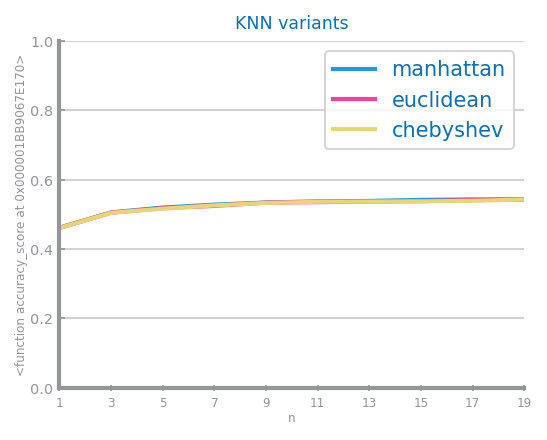

Best results with 19 neighbors and manhattan


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import ds_charts as ds
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from pandas import DataFrame, unique,concat
from matplotlib.pyplot import figure, show
from ds_charts import multiple_line_chart
from sklearn.metrics import accuracy_score

data = df

y = data.pop('readmitted').values
X = data.values
labels = unique(y)
labels.sort()

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

eval_metric = accuracy_score
nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
dist = ['manhattan', 'euclidean', 'chebyshev']
values = {}
best = (0, '')
last_best = 0
for d in dist:
    y_tst_values = []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(trnX, trnY)
        prd_tst_Y = knn.predict(tstX)
        y_tst_values.append(eval_metric(tstY, prd_tst_Y))
        if y_tst_values[-1] > last_best:
            best = (n, d)
            last_best = y_tst_values[-1]
    values[d] = y_tst_values

figure()
multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel=str(accuracy_score), percentage=True)
show()
print('Best results with %d neighbors and %s'%(best[0], best[1]))